In [1]:
%load_ext autoreload
%autoreload 2

# Movies

In [2]:
import matplotlib.pyplot as plt

from movie_ratings import config
from taskchain import Config

In [3]:
# config_name = 'movies/imdb.all.yaml'
config_name = 'movies/imdb.filtered.yaml'
chain = Config(config.TASKS_DIR, config.CONFIGS_DIR / config_name, global_vars=config).chain()
chain

|                           | name               | group   | namespace   | computed   |
|:--------------------------|:-------------------|:--------|:------------|:-----------|
| movies:all_movies         | all_movies         | movies  |             | True       |
| movies:movies             | movies             | movies  |             | True       |
| movies:movie_names        | movie_names        | movies  |             | True       |
| movies:duration_histogram | duration_histogram | movies  |             | True       |
| movies:year_histogram     | year_histogram     | movies  |             | True       |
| movies:directors          | directors          | movies  |             | True       |
| movies:genres             | genres             | movies  |             | True       |
| movies:countries          | countries          | movies  |             | True       |
| movies:actors             | actors             | movies  |             | True       |

In [4]:
print(f'Movie count: {len(chain.movies.value)}')
chain.movies.value.sample(5)

Movie count: 28215


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0116704,tt0116704,First Strike,Ging chaat goo si 4: Gaan dan yam mo,1996,1998-06-26,"Action, Adventure, Comedy",107,Hong Kong,"English, Cantonese, Mandarin, Russian, Ukrainian",Stanley Tong,...,"Jackie Chan, Jackson Lou, Annie Wu, Bill Tung,...",This fourth installment of Chan's Police Story...,6.6,18816,NaN,$ 15318863,$ 21890845,NaN,64.0,60.0
tt2097331,tt2097331,La famiglia Fang,The Family Fang,2015,2016-09-01,"Comedy, Drama, Mystery",105,USA,English,Jason Bateman,...,"Marin Ireland, Jason Bateman, Nicole Kidman, K...",A brother and sister return to their family ho...,6.1,7682,NaN,$ 262921,$ 649555,67.0,41.0,74.0
tt0280380,tt0280380,24 ore,Trapped,2002,2003-03-14,"Action, Crime, Drama",106,"USA, Germany",English,Luis Mandoki,...,"Charlize Theron, Courtney Love, Stuart Townsen...",The Jennings' fight for their daughters life a...,6.2,22504,$ 30000000,$ 7073251,$ 13414416,42.0,141.0,64.0
tt4733640,tt4733640,The Limehouse Golem - Mistero sul Tamigi,The Limehouse Golem,2016,2017-09-01,"Crime, Mystery, Thriller",109,UK,"English, Irish, Chinese, Hebrew, Yiddish",Juan Carlos Medina,...,"Douglas Booth, Olivia Cooke, Sam Reid, María V...","In Victorian London, a Scotland Yard inspector...",6.3,17836,NaN,NaN,$ 2327419,63.0,123.0,146.0
tt0296166,tt0296166,Le donne vere hanno le curve,Real Women Have Curves,2002,2003-03-14,"Comedy, Drama",90,USA,"English, Spanish",Patricia Cardoso,...,"America Ferrera, Lupe Ontiveros, Ingrid Oliu, ...","In East Los Angeles, an 18-year-old struggles ...",6.8,6955,$ 3000000,$ 5853194,$ 7777790,71.0,108.0,74.0


In [5]:
chain.movies.value.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

### Top movies

In [6]:
min_votes = 10 ** 3
chain.movies.value\
    .query(f'reviews_from_users > {min_votes}')\
    .sort_values('avg_vote', ascending=False)\
    .head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0111161,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845,$ 25000000,$ 28699976,$ 28815245,80.0,8232.0,164.0
tt0068646,tt0068646,Il padrino,The Godfather,1972,1972-09-21,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,...,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,9.2,1572674,$ 6000000,$ 134966411,$ 246120974,100.0,3977.0,253.0
tt0071562,tt0071562,Il padrino - Parte II,The Godfather: Part II,1974,1975-09-25,"Crime, Drama",202,USA,"English, Italian, Spanish, Latin, Sicilian",Francis Ford Coppola,...,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,9.0,1098714,$ 13000000,$ 47834595,$ 48035783,90.0,1030.0,178.0
tt0468569,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,9.0,2241615,$ 185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0
tt0110912,tt0110912,Pulp Fiction,Pulp Fiction,1994,1994-10-28,"Crime, Drama",154,USA,"English, Spanish, French",Quentin Tarantino,...,"Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hitmen, a boxer, a gangst...",8.9,1780147,$ 8000000,$ 107928762,$ 222831817,94.0,3058.0,289.0


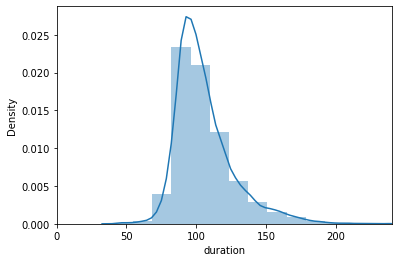

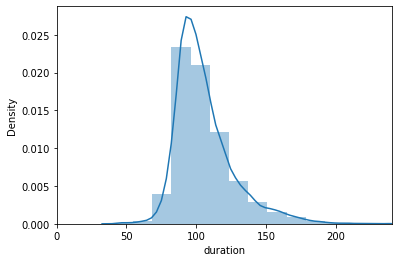

In [7]:
chain.duration_histogram.value

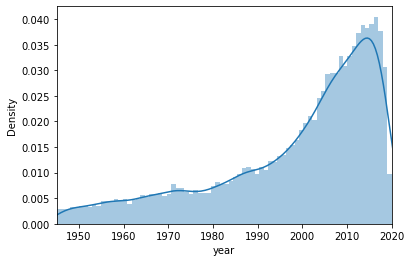

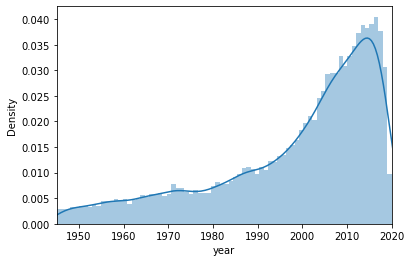

In [8]:
chain.year_histogram.value

## Directors

In [9]:
len(chain.directors.value)

12263

## Actors

In [10]:
len(chain.actors.value)

173183

In [11]:
## Genres

In [12]:
genres = chain.genres.value
for genres, movies in genres.items():
    print(genres, len(movies))

Action 5602
Adult 1
Adventure 3300
Animation 977
Biography 1298
Comedy 10276
Crime 4689
Documentary 1
Drama 16030
Family 1219
Fantasy 1670
Film-Noir 243
History 942
Horror 3736
Music 730
Musical 499
Mystery 2198
Romance 5051
Sci-Fi 1620
Sport 474
Thriller 4436
War 730
Western 420


## Countries


In [13]:
countries = chain.countries.value
for country, movies in countries.items():
    print(country, len(movies))

Afghanistan 3
Albania 7
Algeria 11
Angola 2
Argentina 180
Armenia 5
Aruba 4
Australia 526
Austria 126
Azerbaijan 1
Bahamas 5
Bahrain 4
Bangladesh 31
Belarus 4
Belgium 538
Bermuda 2
Bhutan 2
Bolivia 2
Bosnia and Herzegovina 26
Botswana 2
Brazil 195
British Virgin Islands 2
Bulgaria 85
Burkina Faso 1
Cambodia 8
Cameroon 3
Canada 1559
Cayman Islands 7
Chad 1
Chile 43
China 498
Colombia 30
Costa Rica 2
Croatia 43
Cuba 14
Cyprus 5
Czech Republic 118
Czechoslovakia 53
Côte d'Ivoire 1
Denmark 353
Dominican Republic 2
East Germany 6
Ecuador 1
Egypt 106
Estonia 16
Ethiopia 1
Federal Republic of Yugoslavia 27
Fiji 1
Finland 164
France 3265
Georgia 17
Germany 1618
Ghana 2
Greece 146
Guadeloupe 1
Guatemala 4
Haiti 2
Honduras 1
Hong Kong 535
Hungary 200
Iceland 64
India 2139
Indonesia 43
Iran 166
Iraq 5
Ireland 249
Isle Of Man 9
Israel 97
Italy 1443
Jamaica 4
Japan 1221
Jordan 12
Kazakhstan 8
Kenya 6
Kosovo 2
Kuwait 2
Kyrgyzstan 1
Laos 1
Latvia 10
Lebanon 17
Liberia 1
Libya 2
Liechtenstein 10
Lithu